#HEART

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import seaborn as sns

In [5]:
df= pd.read_csv('heart.csv')

In [6]:
df.head(5) # limited number of rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
#LE: Sex, FastingBS, ExerciseAngina
#Categorical: ChestPainType, RestingECG, ST_Slope
#Integer: Age, RestingBP, Cholestrol, MaxHR, Oldpeak

In [8]:
df.shape #To find the shape(row,columns) 4240 instances and 16 features

(918, 12)

In [9]:
df.size #Total number of cells
#total number of cells

11016

In [10]:
df.info() #find the values, shows features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.isnull()#null values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

A bar plot of the number of null values in the dataset

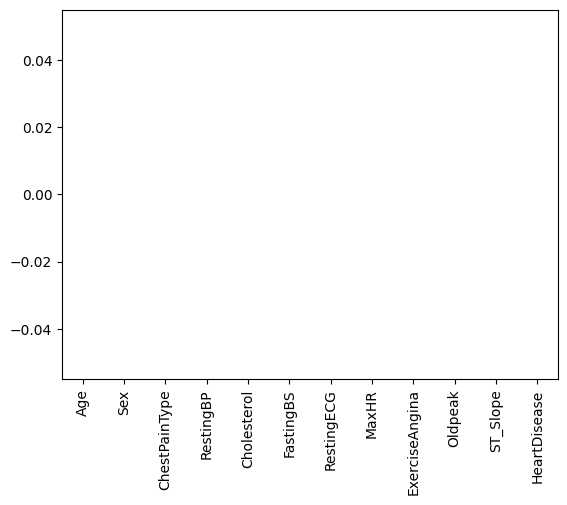

In [13]:
df.isnull().sum().plot.bar()
plt.show()

To show the columns or features of the dataset

In [14]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

To display unique values before Encoding

In [15]:
for i in df:
  print(i,np.unique(df[i]))

Age [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
RestingBP [  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]
Cholesterol [  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263

Label Encoding all the categorical values 

We decided to go with Label Encoding as the the number of categories in each feature with categorical values were minimal. If there were many we would have chosen One-Hot encoding.

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
x=list(df['Sex'].unique())

In [18]:
le.fit(x)

LabelEncoder()

In [19]:
df['Sex']=le.transform(df.Sex)

In [20]:
x=list(df['ChestPainType'].unique())
le.fit(x)
df['ChestPainType']=le.transform(df.ChestPainType)

In [21]:
x=list(df['RestingECG'].unique())
le.fit(x)
df['RestingECG']=le.transform(df.RestingECG)

In [22]:
x=list(df['ExerciseAngina'].unique())
le.fit(x)
df['ExerciseAngina']=le.transform(df.ExerciseAngina)

In [23]:
x=list(df['ST_Slope'].unique())
le.fit(x)
df['ST_Slope']=le.transform(df.ST_Slope)

All the above are steps to label encode

Final encoded dataset

In [24]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


To display unique values after encoding

In [25]:
for i in df:
  print(i,np.unique(df[i]))#CHECKS UNIQUE VALUES

Age [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
Sex [0 1]
ChestPainType [0 1 2 3]
RestingBP [  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]
Cholesterol [  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 2

From this pairplot, the following conclusions may be drawn:
1. Age correlates positively with RestingBP and Cholesterol.
2. Age and RestingBP have a negative connection with MaxHR.
3. Age, RestingBP, Cholesterol, MaxHR, and Oldpeak seem to be distributed differently across people with and without heart disease.
4. There is no obvious linear connection between the variables, indicating that a nonlinear model may be required for forecasting.
5. The association between ChestPainType and the other variables in the dataset is unclear.
6. The relationship between Oldpeak and MaxHR is negative.
7. There seems to be a link between resting blood pressure and cholesterol.

Overall, the pairplot may help us uncover any potential correlations between the variables and is a valuable tool for selecting features in machine learning models.


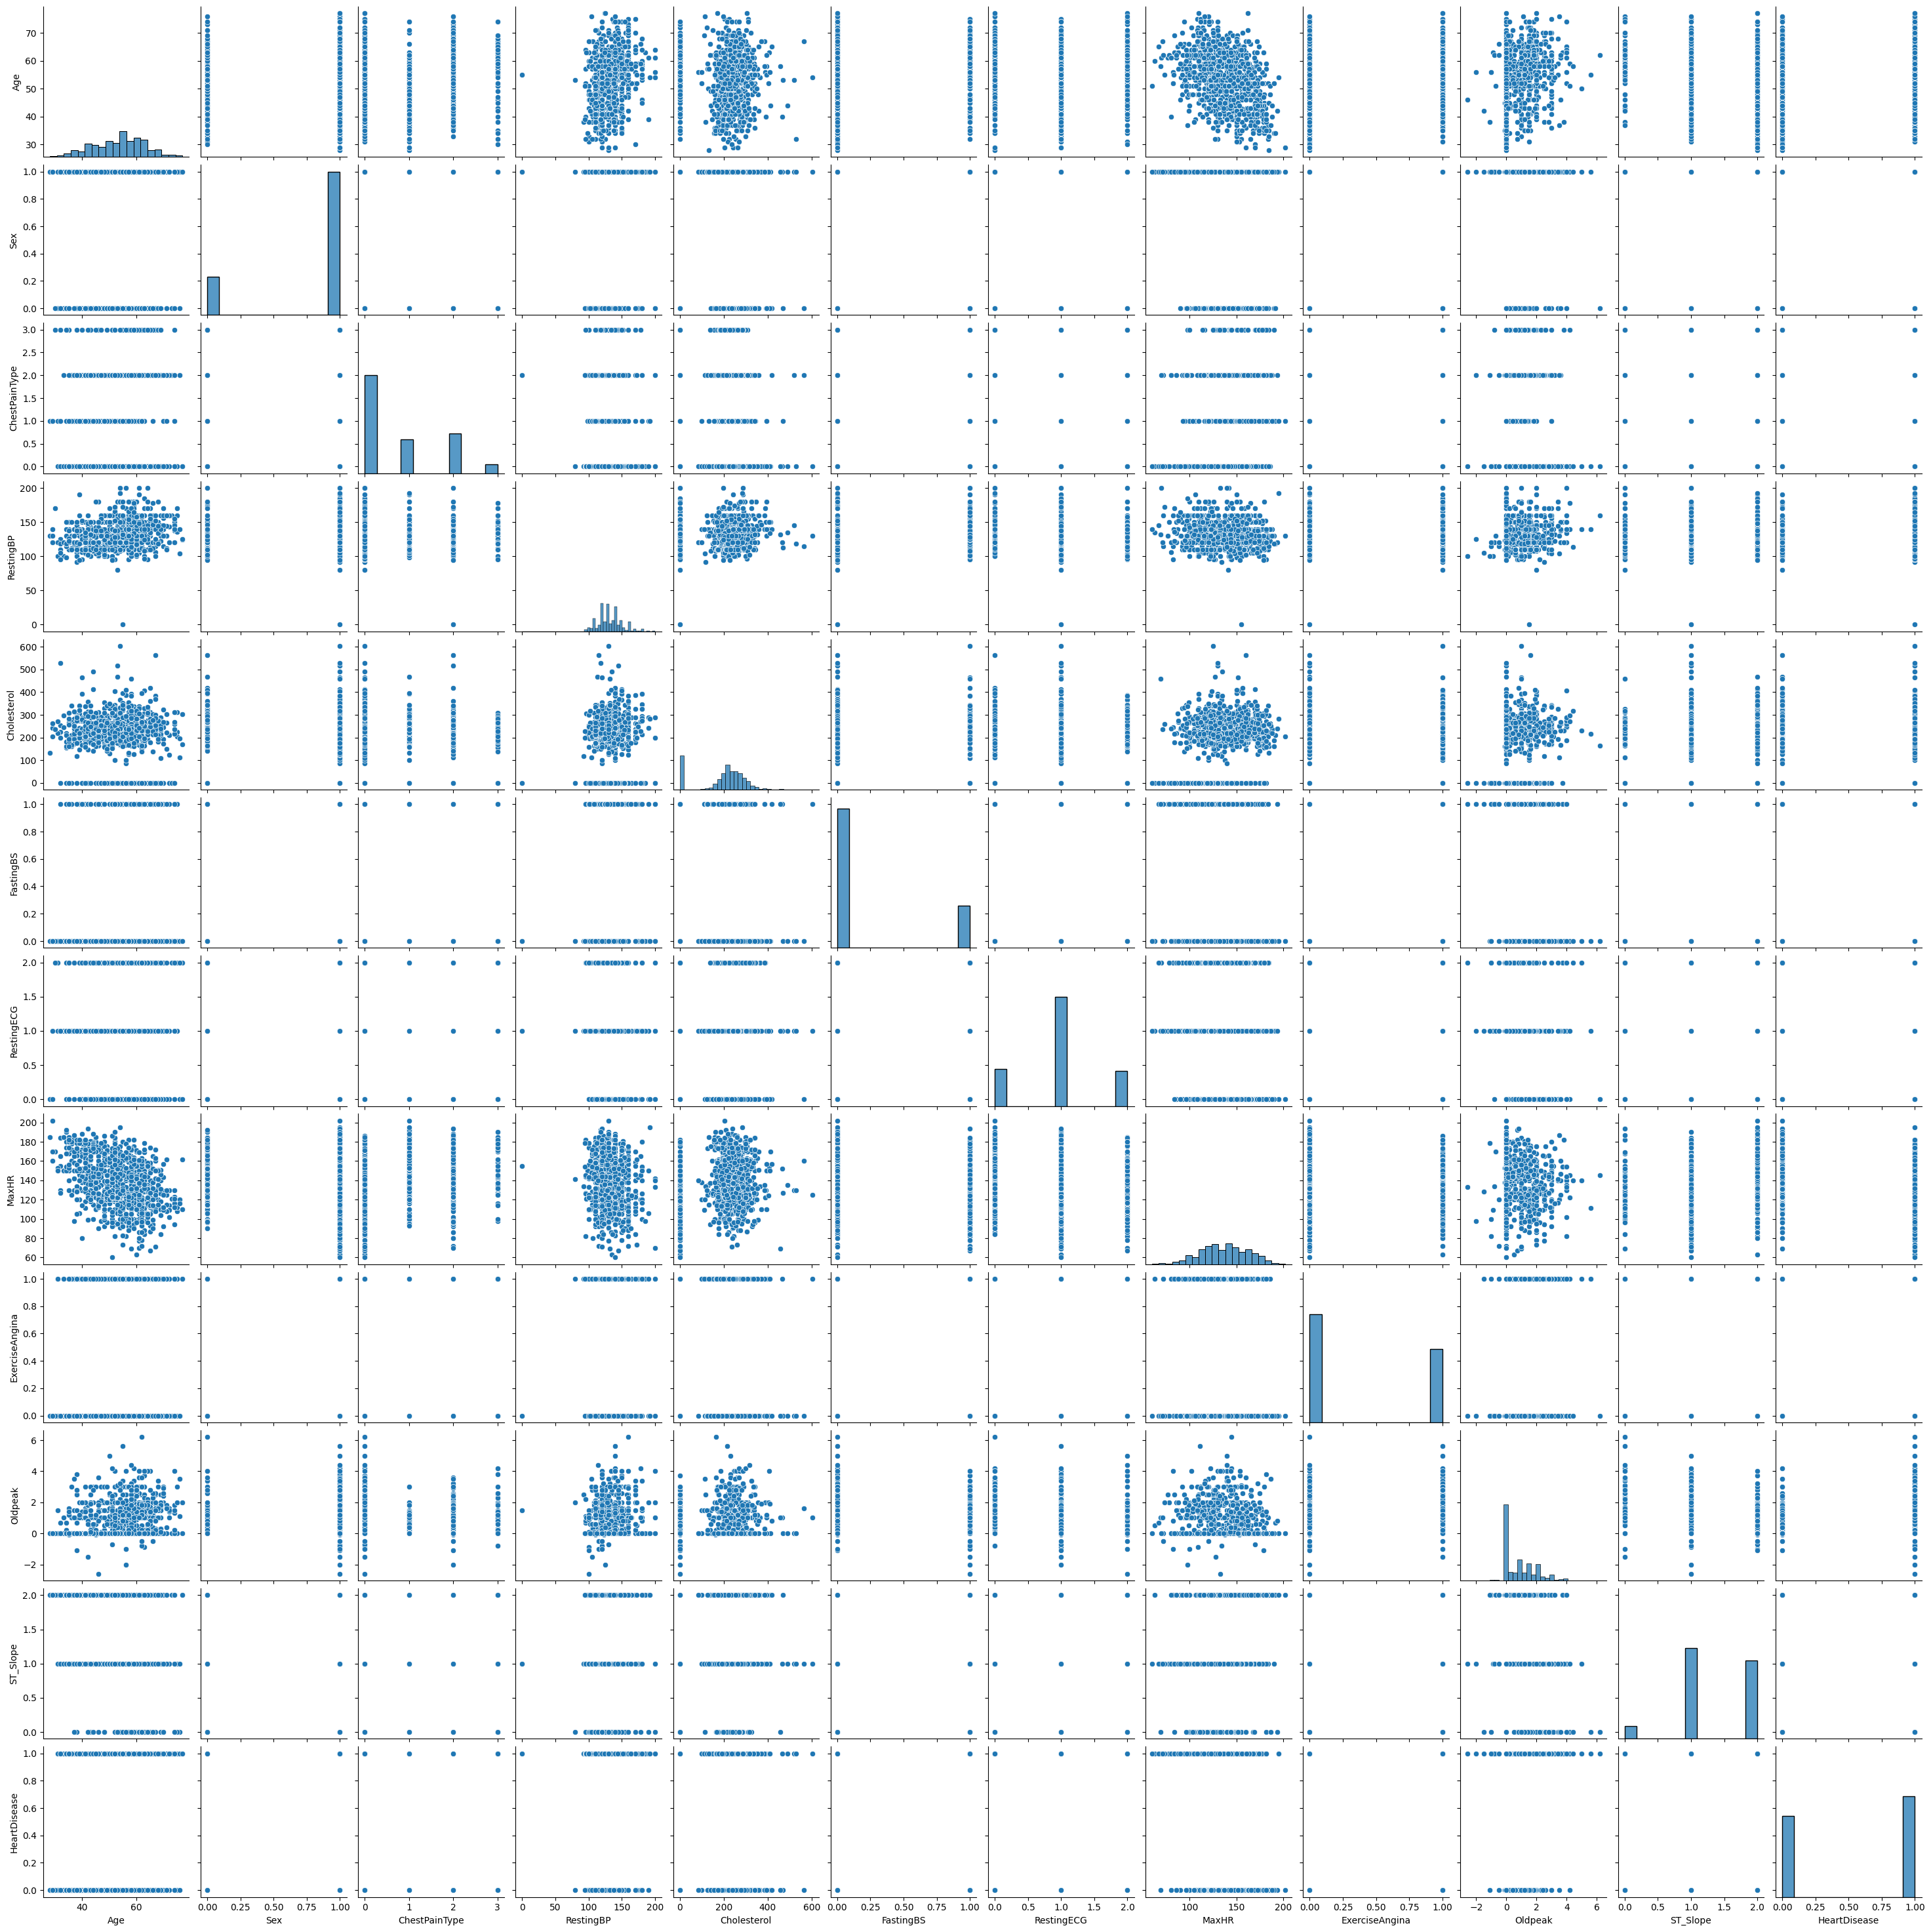

In [26]:
sns.pairplot(df, diag_kind="hist")

In [31]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='HeartDisease', ylabel='count'>

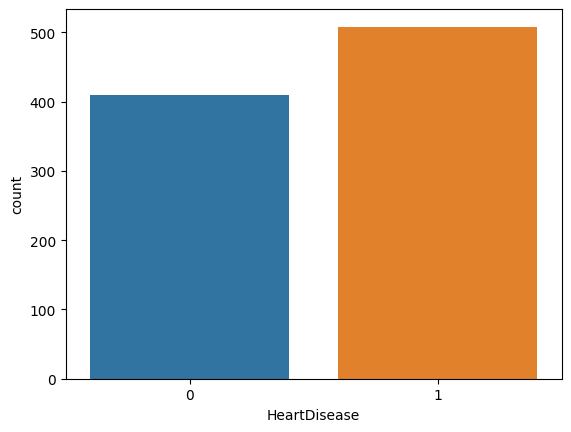

In [32]:
sns.countplot(x='HeartDisease', data=df)

THE ABOVE GRAPH DEPICTS THAT IN OUR DATASET, APPROXIMATELY OVER 500 PEOPLE ARE ACTUALLY PRONE TO HEART DISEASE GIVEN THE FEATURES AND ABOUT 400 PEOPLE ARE NOT

Text(0, 0.5, 'Number of patients')

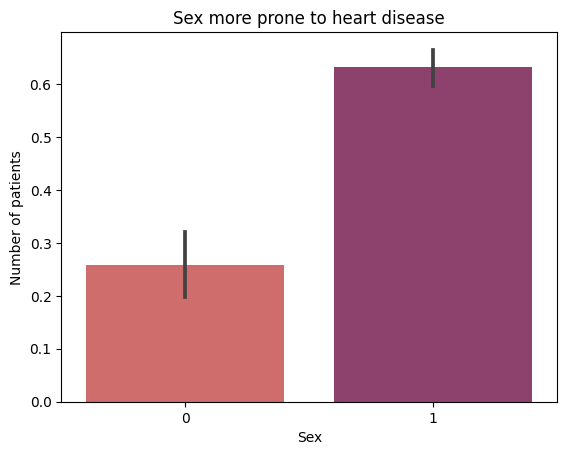

In [33]:
sns.barplot(x='Sex', y='HeartDisease', data=df, palette="flare")
plt.title('Sex more prone to heart disease')
plt.xlabel('Sex')
plt.ylabel('Number of patients')

INFERENCE:
Given that there are more male patients with heart illness than female patients, it may be concluded from this image that men are more likely than women to have heart disease. The fact that the standard for men with heart disease is greater than the bar for women with heart disease serves as the foundation for this assumption. It's crucial to remember that this conclusion is based on the information in this specific dataset and could not necessarily apply to the whole population.

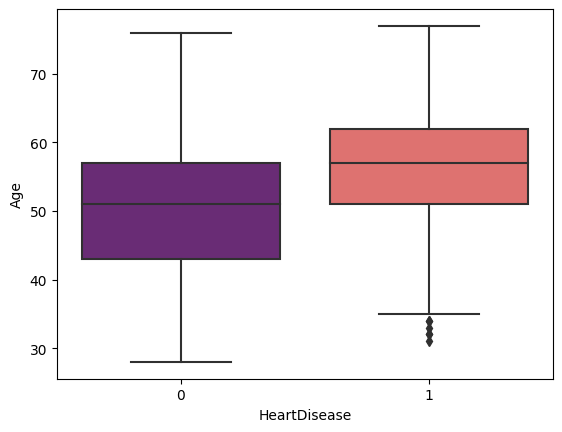

In [34]:
sns.boxplot(data=df, x='HeartDisease', y='Age', palette="magma")
plt.show()

INFERENCE:
This boxplot suggests that people with heart disease(1)  are often older than those without heart disease. The distribution of ages for patients with heart disease is more skewed towards older ages than the distribution for patients without heart disease, and this inference is based on the facts that the median (represented by the line inside the box) for patients with heart disease is higher than the median for patients without heart disease. It's crucial to remember that this conclusion is based on the information in this specific dataset and could not necessarily apply to the whole population.
The box plot may also be used to spot any extreme values or outliers in the dataset. The box for individuals with heart disease contains numerous dots above the bottom border, which signify probable outliers. Understanding the nature of these outliers and their possible influence on the association between ageing and heart disease may need more investigation.


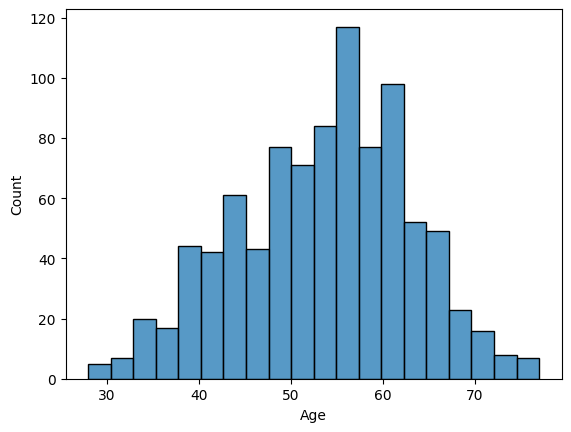

In [35]:
sns.histplot(data=df, x='Age', bins=20)
plt.show()

INFERENCE:
The distribution of ages in the dataset is inferred from this representation to be about normally distributed, with a peak occurring between the ages of 55 and 65. This conclusion is based on the histogram's resemblance to a bell curve. Also, the dataset seems to include some patients who are much older than the bulk of patients based on the histogram's extended tail towards older ages.
Another conclusion drawn from this visualisation is that there aren't many patients in the dataset who are under the age of 40. This is supported by the fact that there are few patients in the youngest age bins of the histogram (i.e., ages less than 40). This can be as a result of the lower prevalence of cardiac disease in younger people or a dataset restriction (i.e., it may not include many younger patients).


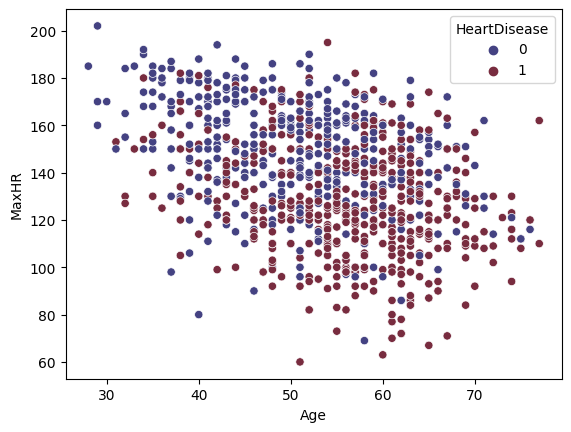

In [36]:
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', palette="icefire")
plt.show()

INFERENCE:
This graph suggests that individuals with heart illness often have lower maximal heart rates than those without heart disease. This is due to the fact that people with heart disease tend to cluster towards the lower end of the maximum heart rate range, while healthy individuals are more evenly distributed across the maximum heart rate range.

Another conclusion drawn from this visualisation is that, whether or not patients have cardiac disease, there is a universally negative correlation between age and maximal heart rate. This is based on the scatterplot's downward trend from left to right, which reveals that maximal heart rate tends to decline as age rises.

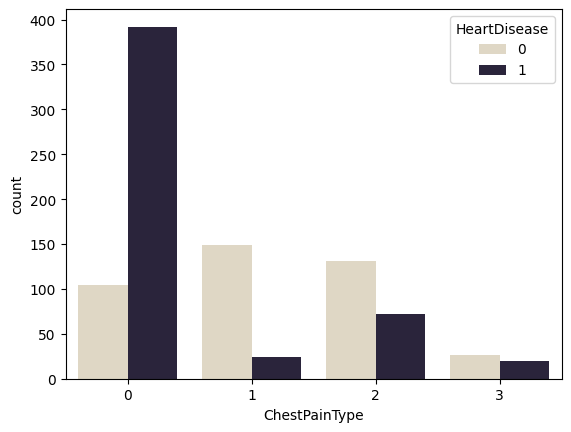

In [37]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette="ch:s=-.2,r=.6")
plt.show()

INFERENCE:
This grap suggests that people with type 0 and type 1 chest pain are more likely to suffer heart disease than those with type 2 and type 3 chest pain. This is based on the observation that patients with chest pain kinds 0 and 1 are more likely to have heart disease than those without, but patients with chest pain types 2 and 3 are more likely to have heart disease.
Another conclusion drawn from this visualisation is that regardless of whether a patient has cardiac disease, type 3 chest pain is the most prevalent form of chest pain reported by patients in the sample. This is based on the fact that the plot's y-axis shows that chest pain type 3 has the largest count.

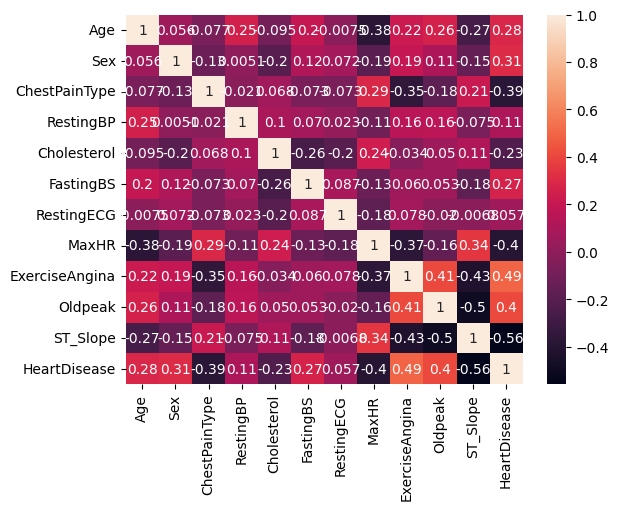

In [38]:
sns.heatmap(df.corr(), annot=True)
plt.show()

The heatmap is an effective tool for showing the strength and direction of the linear connection between variable pairs in the dataset. A correlation coefficient that is positive shows a positive association between two variables, while a correlation value that is negative suggests a negative relationship. A correlation value of 0 shows that there is no linear association.
Age, resting blood pressure (RestingBP), and cholesterol levels are favourably connected with one another, but age, RestingBP, and cholesterol levels are negatively correlated with maximum heart rate obtained during exercise (MaxHR). This shows that older individuals with greater RestingBP and cholesterol levels may have a higher risk of developing heart disease, but those with a higher maximum heart rate obtained during exercise may have a lower risk of developing heart disease.
There is a somewhat significant link between chest pain type and heart disease, which suggests that people with particular forms of chest pain may be more likely to develop heart disease. In addition, there is a modest negative connection between the slope of the ST segment during peak exertion (ST Slope) and heart disease, suggesting that individuals with a more downwardly sloped ST segment during exercise may be less likely to develop heart disease.


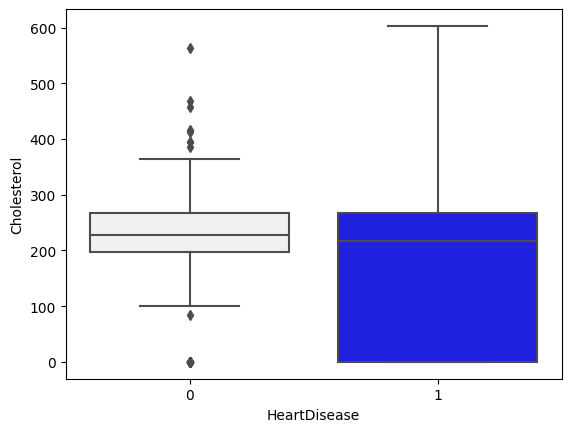

In [39]:
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol', palette="light:b")
plt.show()

INFERENCE:The x-axis indicates the prevalence or absence of cardiac disease, whilst the y-axis indicates cholesterol levels.
The box plot reveals that the median cholesterol levels of individuals with heart disease are somewhat higher than those of people without heart disease. In addition, the box plot reveals that there are a few heart disease patients with abnormally high or low cholesterol levels (outliers).
Consequently, we may deduce that high cholesterol levels may be a risk factor for heart disease, and additional research is required to determine the nature of the association between cholesterol levels and heart disease.

<ipython-input-40-dfe88af54dbb>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Cholesterol', y='RestingBP', palette="vlag")


Text(0, 0.5, 'Resting Blood Pressure')

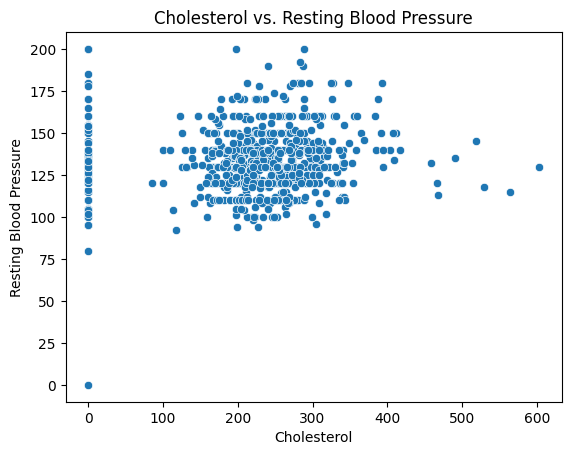

In [40]:
sns.scatterplot(data=df, x='Cholesterol', y='RestingBP', palette="vlag")
plt.title('Cholesterol vs. Resting Blood Pressure')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')

Inference:
There is no apparent linear association between cholesterol levels and resting blood pressure, as seen by the scatter figure. Yet, we can observe that there is a concentration of data points with elevated cholesterol and blood pressure during rest.
This implies that increased cholesterol levels may be related with greater resting blood pressure, although other variables also influence resting blood pressure. Consequently, further research is required to comprehend the association between cholesterol levels and resting blood pressure, as well as the function of other possible heart disease risk factors.


Text(0, 0.5, 'Max Heart Rate')

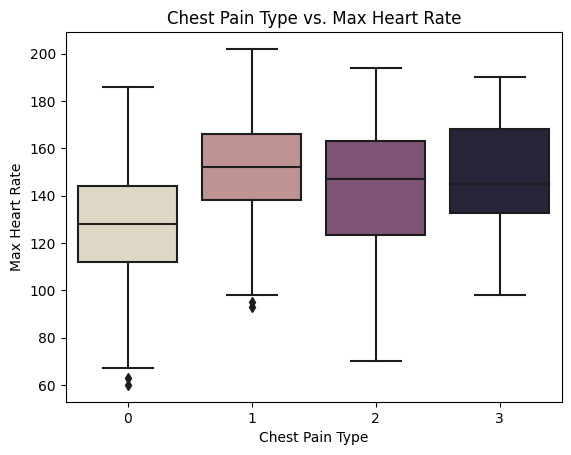

In [41]:
sns.boxplot(data=df, x='ChestPainType', y='MaxHR', palette="ch:s=-.2,r=.6")
plt.title('Chest Pain Type vs. Max Heart Rate')
plt.xlabel('Chest Pain Type')
plt.ylabel('Max Heart Rate')

Inference:Patients with chest pain types 0 and 1 tend to have a greater maximal heart rate than those with chest pain types 2 and 3. This shows that the kind of chest discomfort may be associated with the highest heart rate reached during exercise.

Yet, there is a substantial overlap between the various forms of chest pain, suggesting that chest pain type alone may not be a reliable predictor of the highest heart rate obtained during exercise. Consequently, further research is required to comprehend the association between chest pain kind and maximal heart rate obtained during exercise, as well as the function of other possible heart disease risk factors.

In [42]:
X = df.drop(['HeartDisease'], axis= 1)
y = df['HeartDisease']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


##Support Vector Machine(SVM)

In [45]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred=classifier.predict(X_test)

Importing necessary performance metrics

In [47]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_curve, 
    roc_auc_score
)

To display the confusion matrix for the model

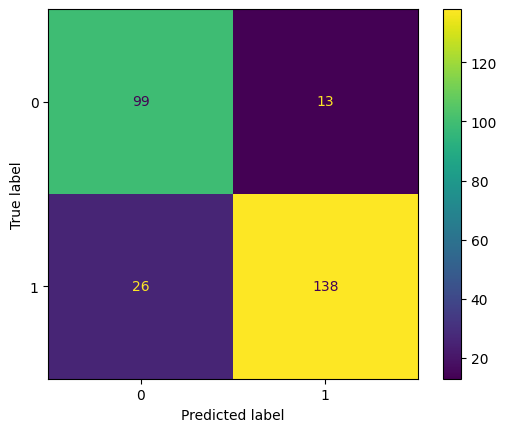

In [48]:

labels = [0,1]
confusion_matrix_svm= confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=labels)
disp.plot();

Accuracy of the model

In [49]:
accuracy_score_svm= accuracy_score(y_test, y_pred)
accuracy_score_svm

0.8586956521739131

F1 score of the model

In [50]:
f1_svm= f1_score(y_pred, y_test, average="weighted")
f1_svm

0.8577360204768019

ROC Curve and Area under the ROC Curve

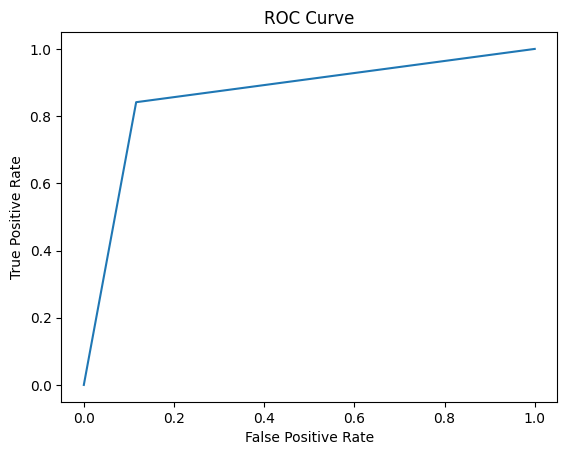

In [51]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr_svm,tpr_svm)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
score_svm= roc_auc_score(y_test, y_pred)
score_svm

0.8626959930313588

Performing K-Fold cross validation to see if accuracy can be further improved

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
results_svm= cross_val_score(classifier, X, y, cv=kfold)

In [56]:
print(results_svm)

[0.83695652 0.88043478 0.88043478 0.81420765 0.8579235 ]


##Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Initializing a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

# Using the classifier to make predictions on the testing data
pred = clf.predict(X_test)


To display the confusion matrix

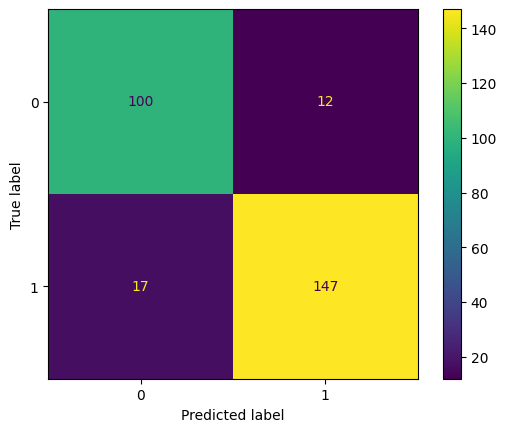

In [58]:
labels = [0,1]
confusion_matrix_rf= confusion_matrix(y_test,pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=labels)
disp.plot();

Accuracy

In [59]:
accuracy_score_rf= accuracy_score(y_test,pred)
accuracy_score_rf

0.894927536231884

F1 score

In [60]:
f1_rf= f1_score(y_pred, y_test, average="weighted")
f1_rf

0.8577360204768019

ROC Curve and Area under the ROC curve

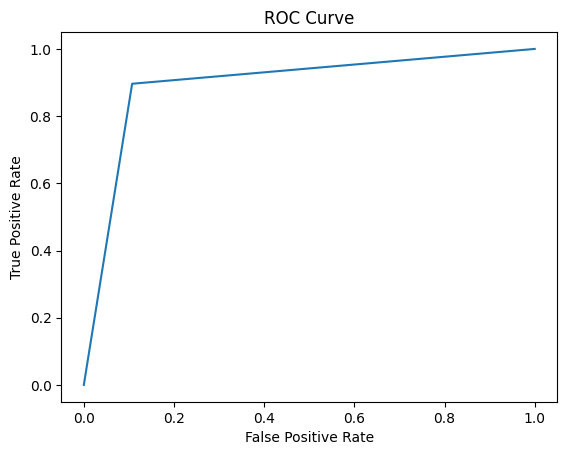

In [61]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
score_rf= roc_auc_score(y_test, pred)
score_rf

0.8945993031358885

INFERENCE:

From the performance metrics applied on both models we can see that Random Forest Algorithm works better.The margin is negligible but our topic necessitates maximum accuracy possible as it predicts if you are at risk of getting a stroke.

Creating functions to predict to facilitate the development of our website.

Without taking inputs

In [63]:
def predicted(age, sex, c_pain, rBP, Ch, FBs, RECG, MHR, EA, OP, ST_S):
  output=clf.predict([[age, sex, c_pain, rBP, Ch, FBs, RECG, MHR, EA, OP, ST_S]])
  if (output[0]==0):
    print("No risk of stroke or heart disease")
  else:
    print("Patient is at risk of stroke or heart disease") 

In [ ]:
predicted(45, 1, 3, 120, 180, 0, 2, 176, 1, 2.5, 1)

Taking inputs

In [ ]:
def predicter(clf):
  ip1=int(input("Enter age: "))
  ip2=int(input("Enter sex(0-Female,1-Male): "))
  ip3=int(input("Enter ChestPain type(TA: Typical Angina-3, ATA: Atypical Angina-1, NAP: Non-Anginal Pain-2, ASY: Asymptomatic-0): "))
  ip4=int(input("Enter Resting BP: "))
  ip5=int(input("Enter Cholestrol: "))
  ip6=int(input("Enter Fasting Bs(1: if FastingBS > 120 mg/dl, 0: otherwise): "))
  ip7=int(input("Enter Resting ECG(Normal: Normal-1, ST: having ST-T wave abnormality-2, LVH: showing left ventricular hypertrophy by Estes' criteria-0): "))
  ip8=int(input("Enter Max Heart rate: "))
  ip9=int(input("Enter whether Excercise Angina(No-0,Yes-1): "))
  ip10=float(input("Enter Oldpeak: "))
  ip11=int(input("Enter ST_Slope(Up: upsloping-2, Flat: flat-1, Down: downsloping-0): "))

  output=clf.predict([[ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11]])
  if output[0]==0:
    print("No risk of stroke or heart disease")
  else:
    print("Patient is at risk of stroke or heart disease")
  
  

To link our python code to the website

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import pandas as pd
import numpy as np

In [ ]:
app = Flask(__name__)


@app.route('/')
def home():
    return render_template('original.html')


@app.route("/predict", methods=['GET','POST'])
def predict():
    if request.method == 'POST':
        age = float(request.form['age'])
        sex = float(request.form['sex'])
        cp = float(request.form['cp'])
        trestbps = float(request.form['trestbps'])
        chol = float(request.form['chol'])
        fbs= float(request.form['fbs'])
        restecg = float(request.form['restecg'])
        thalach = float(request.form['thalach'])
        exang = float(request.form['exang'])
        oldpeak = float(request.form['oldpeak'])
        slope = float(request.form['slope'])

        args = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope]

        res = predicted([args])
    return render_template('predict.html', prediction = res)
if __name__ == '__main__':
    app.run()

#DIABETES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

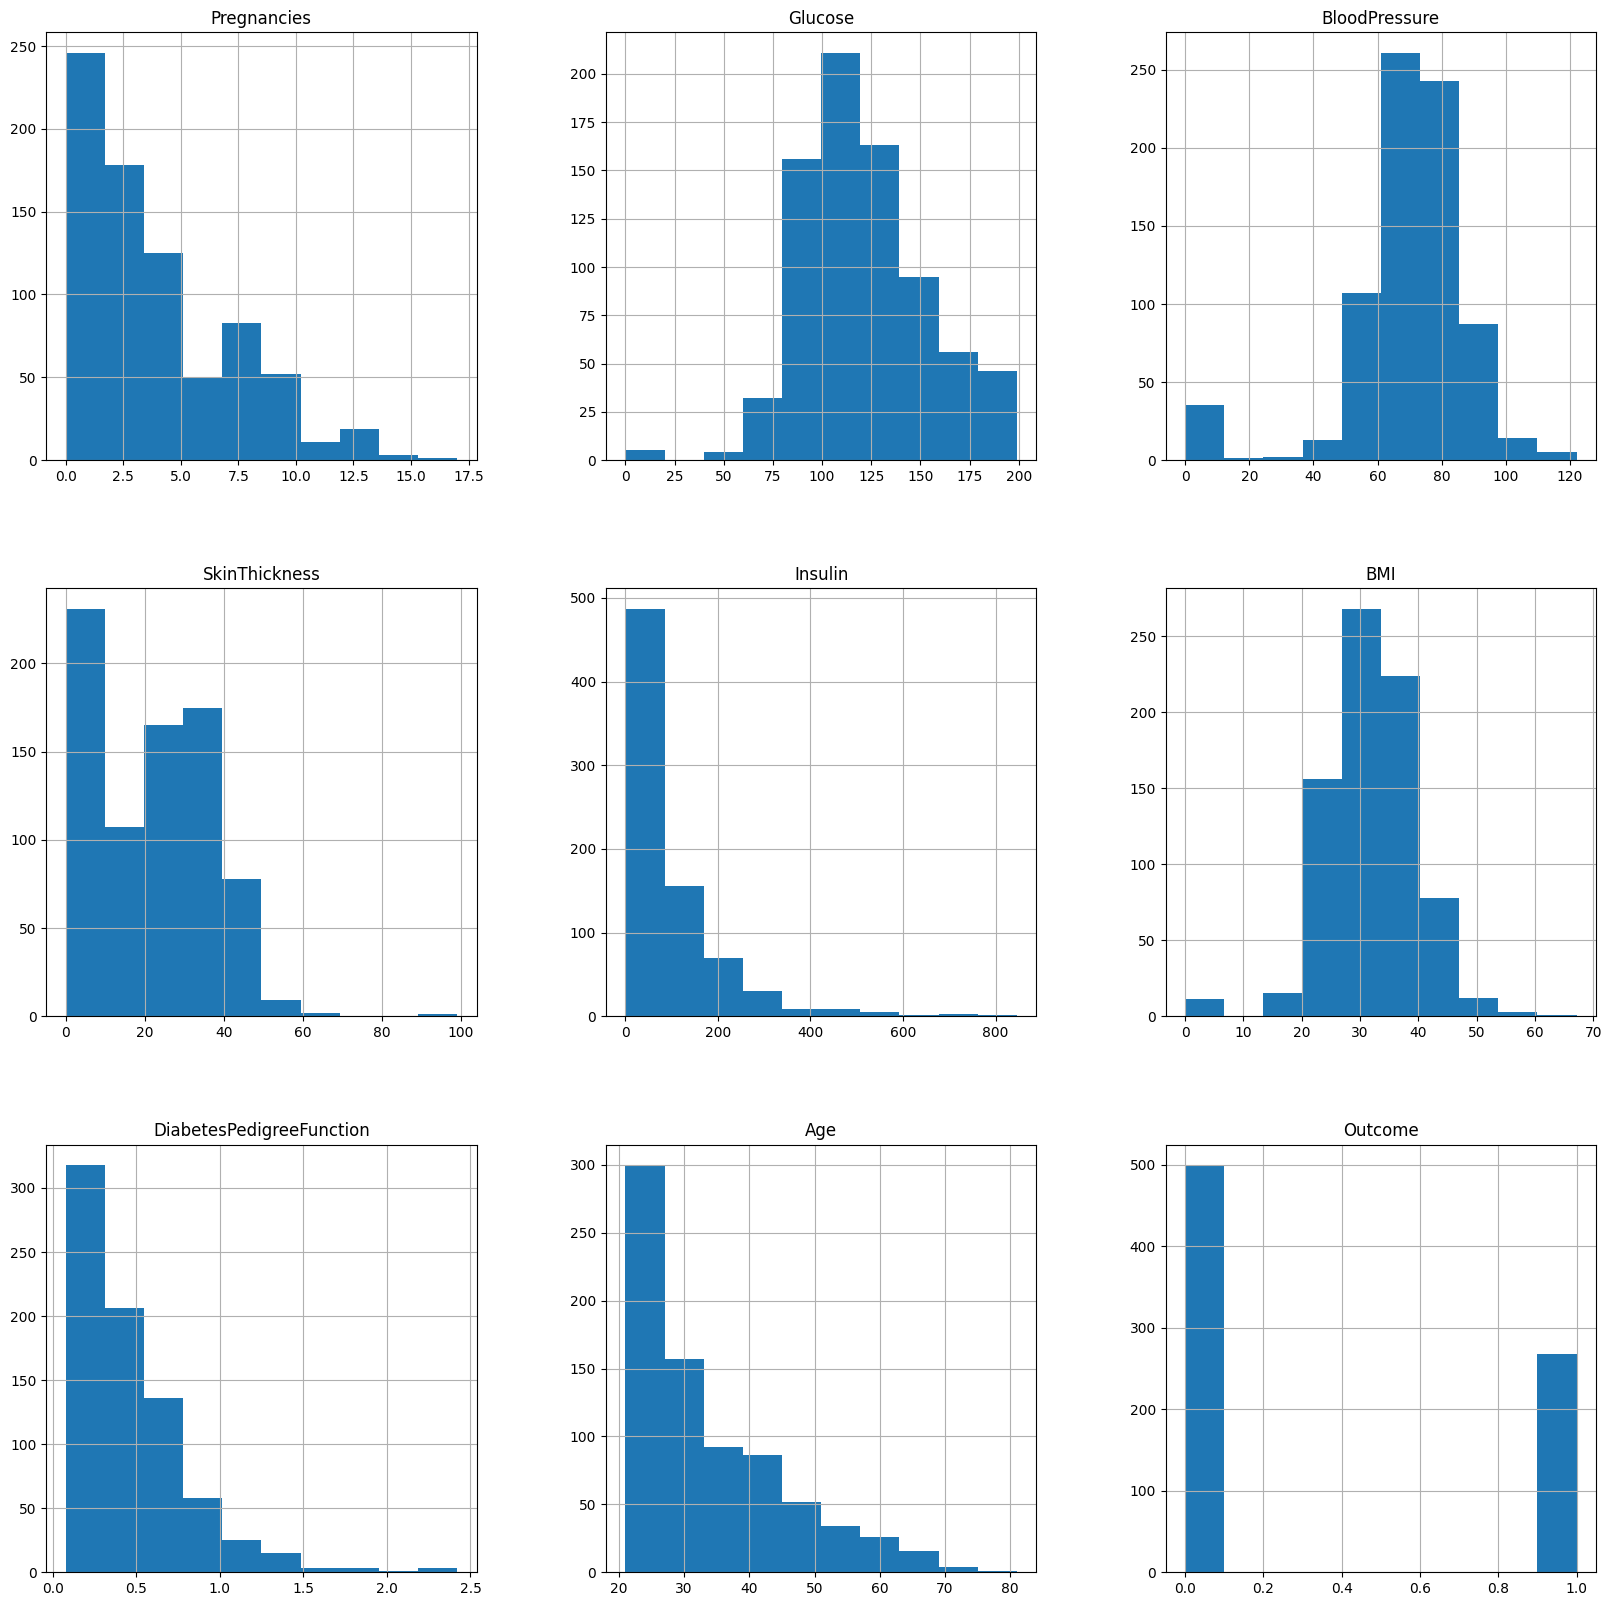

In [ ]:
df.hist(figsize = (20,20))

This command can be useful for quickly visualizing the distribution of each numeric feature in the dataset. For example, it can help identify any features that have a large number of values in a particular range or features that have many missing values. Additionally, it can be useful for identifying potential outliers or skewness in the distribution of a feature, which can be important considerations when building a predictive model.

In [ ]:
df_copy=df

<Axes: >

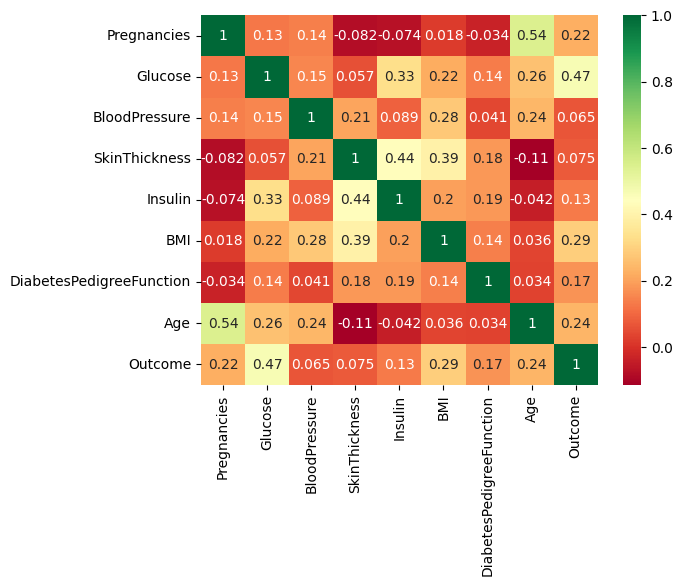

In [ ]:
sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

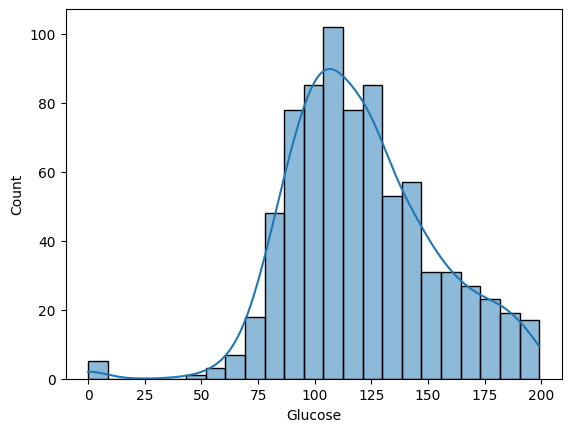

In [ ]:
sns.histplot(data=df, x="Glucose", kde=True)
plt.show()

The histogram can give insights into the range of glucose values in the dataset and the number of observations in each range. The kernel density estimation plot can provide additional information about the shape of the distribution of the feature, indicating whether it is normally distributed or skewed, which can be an important consideration when selecting appropriate statistical methods for data analysis.

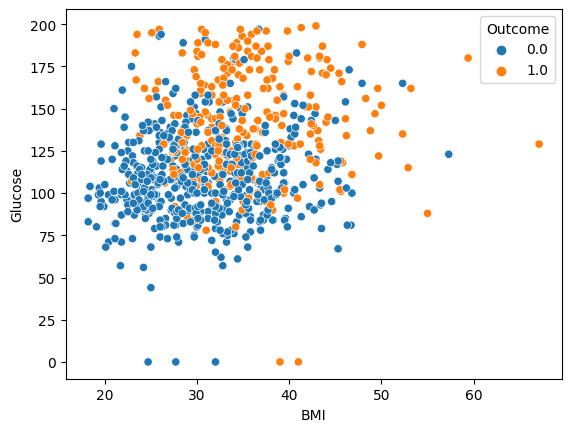

In [ ]:
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome")
plt.show()

The scatter plot can show any patterns or trends in the data, such as a positive or negative correlation between the two features, as well as how these patterns relate to the target variable.

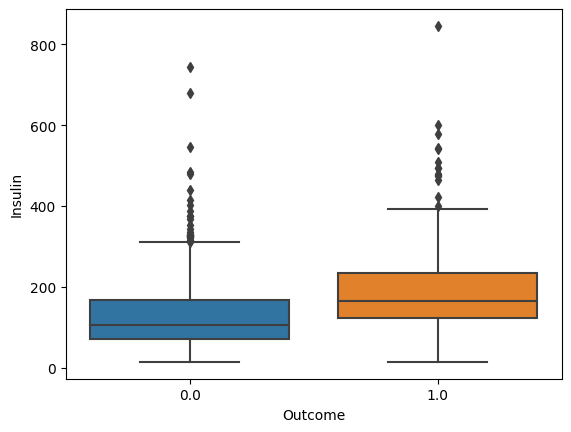

In [ ]:
sns.boxplot(data=df, x="Outcome", y="Insulin")
plt.show()

The box in the boxplot represents the interquartile range (IQR) of the data, with the lower and upper hinges representing the first and third quartiles, respectively. The horizontal line inside the box represents the median insulin level, while the whiskers extending from the box represent the range of the data, excluding outliers.
The plot shows that the median insulin level is higher for diabetic patients (Outcome = 1) compared to non-diabetic patients (Outcome = 0). There are also some outliers for both classes, with diabetic patients having more extreme values. Overall, this suggests that insulin levels may be a useful feature for predicting diabetes in this dataset.

In [ ]:
df["Insulin"] = df["Insulin"].replace(0, np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)
df["BMI"] = df["BMI"].replace(0, np.nan)

In [ ]:
from sklearn.impute import KNNImputer
# Create a copy of the dataset to impute missing values
dfc = df.copy()

# Fit and transform the KNN imputer on the entire dataset
imputer = KNNImputer(n_neighbors=3)
dfc.iloc[:, :] = imputer.fit_transform(dfc)

In [ ]:
dfc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [ ]:
df=dfc

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=80)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_curve, 
    roc_auc_score
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing a Random Forest Classifier
c = RandomForestClassifier(n_estimators=300, random_state=10)

# Fitting the classifier to the training data
c.fit(X_train, y_train)

# Using the classifier to make predictions on the testing data
pred = c.predict(X_test)

To display the confusion matrix

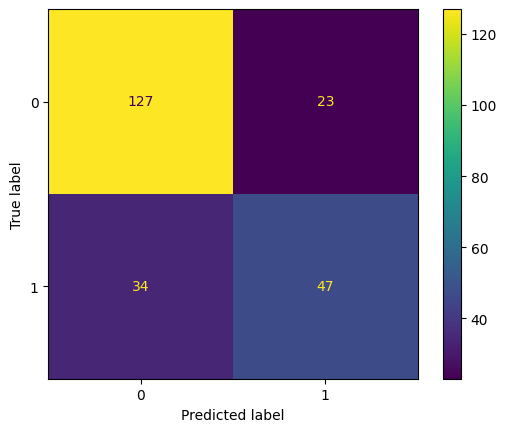

In [ ]:
labels = [0,1]
confusion_matrix_rf= confusion_matrix(y_test,pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=labels)
disp.plot();

Accuracy

In [ ]:
accuracy_score_rf= accuracy_score(y_test,pred)
accuracy_score_rf

0.7532467532467533

F1 score

In [ ]:
f1_rf= f1_score(pred, y_test, average="weighted")
f1_rf

0.7578706508882612

ROC Curve and Area under the ROC curve

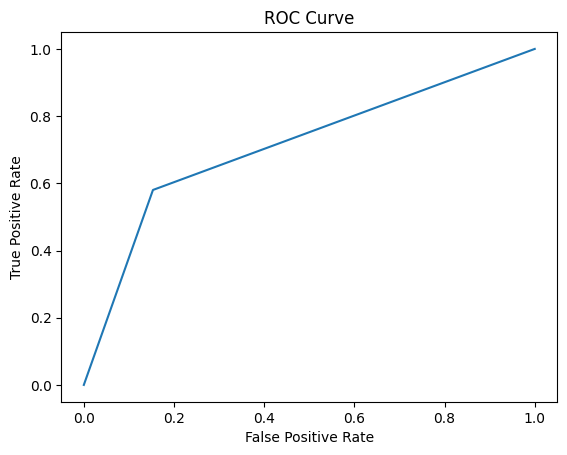

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
score_rf= roc_auc_score(y_test, pred)
score_rf

0.7134567901234568

In [ ]:
def DIABETES(c):
  ip1=float(input("Enter Number of pregnancies: "))
  ip2=float(input("Enter Glucose: "))
  ip3=float(input("Enter Blood Pressure: "))
  ip4=float(input("Enter Skin Thickness: "))
  ip5=float(input("Enter Insulin Levels: "))
  ip6=float(input("Enter BMI: "))
  ip7=float(input("Enter DiabetesPedigreeFunction: "))
  ip8=float(input("Enter Age: "))

  output=c.predict([[ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8]])
  if output[0]==0:
    print("Patient is not at risk of diabetes.")
  else:
    print("Patient is at risk of diabetes. Take Care!")

#MATERNAL HEALTH CARE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/Maternal Health Dataset.csv")

In [ ]:
df.size

7098

In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

<Axes: >

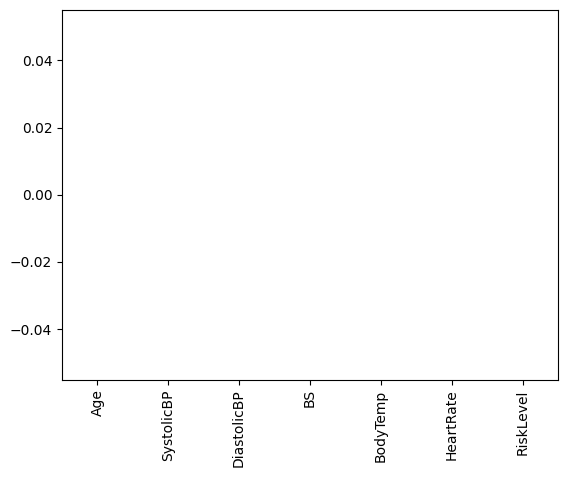

In [ ]:
df.isnull().sum().plot.bar()

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
for i in df:
  print(i,np.unique(df[i]))

Age [10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 54 55 56 59 60 62 63 65
 66 70]
SystolicBP [ 70  75  76  78  80  83  85  90  95  99 100 110 115 120 129 130 135 140
 160]
DiastolicBP [ 49  50  60  63  65  68  69  70  75  76  80  85  89  90  95 100]
BS [ 6.    6.1   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.01  7.1
  7.2   7.5   7.6   7.7   7.8   7.9   8.    9.   10.   11.   12.   13.
 15.   16.   17.   18.   19.  ]
BodyTemp [ 98.   98.4  98.6  99.  100.  101.  102.  103. ]
HeartRate [ 7 60 65 66 67 68 70 75 76 77 78 80 82 86 88 90]
RiskLevel ['high risk' 'low risk' 'mid risk']


<Axes: xlabel='RiskLevel', ylabel='count'>

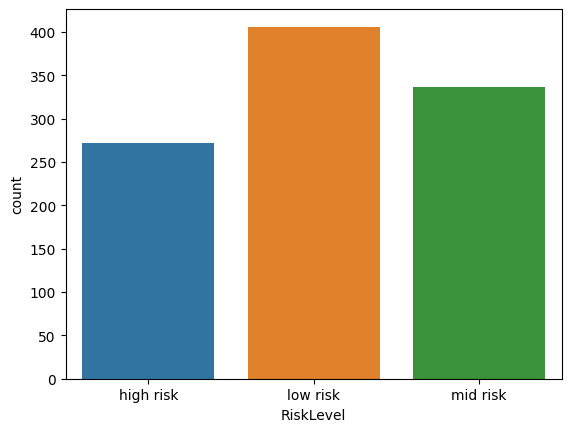

In [ ]:
sns.countplot(x='RiskLevel', data=df)

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


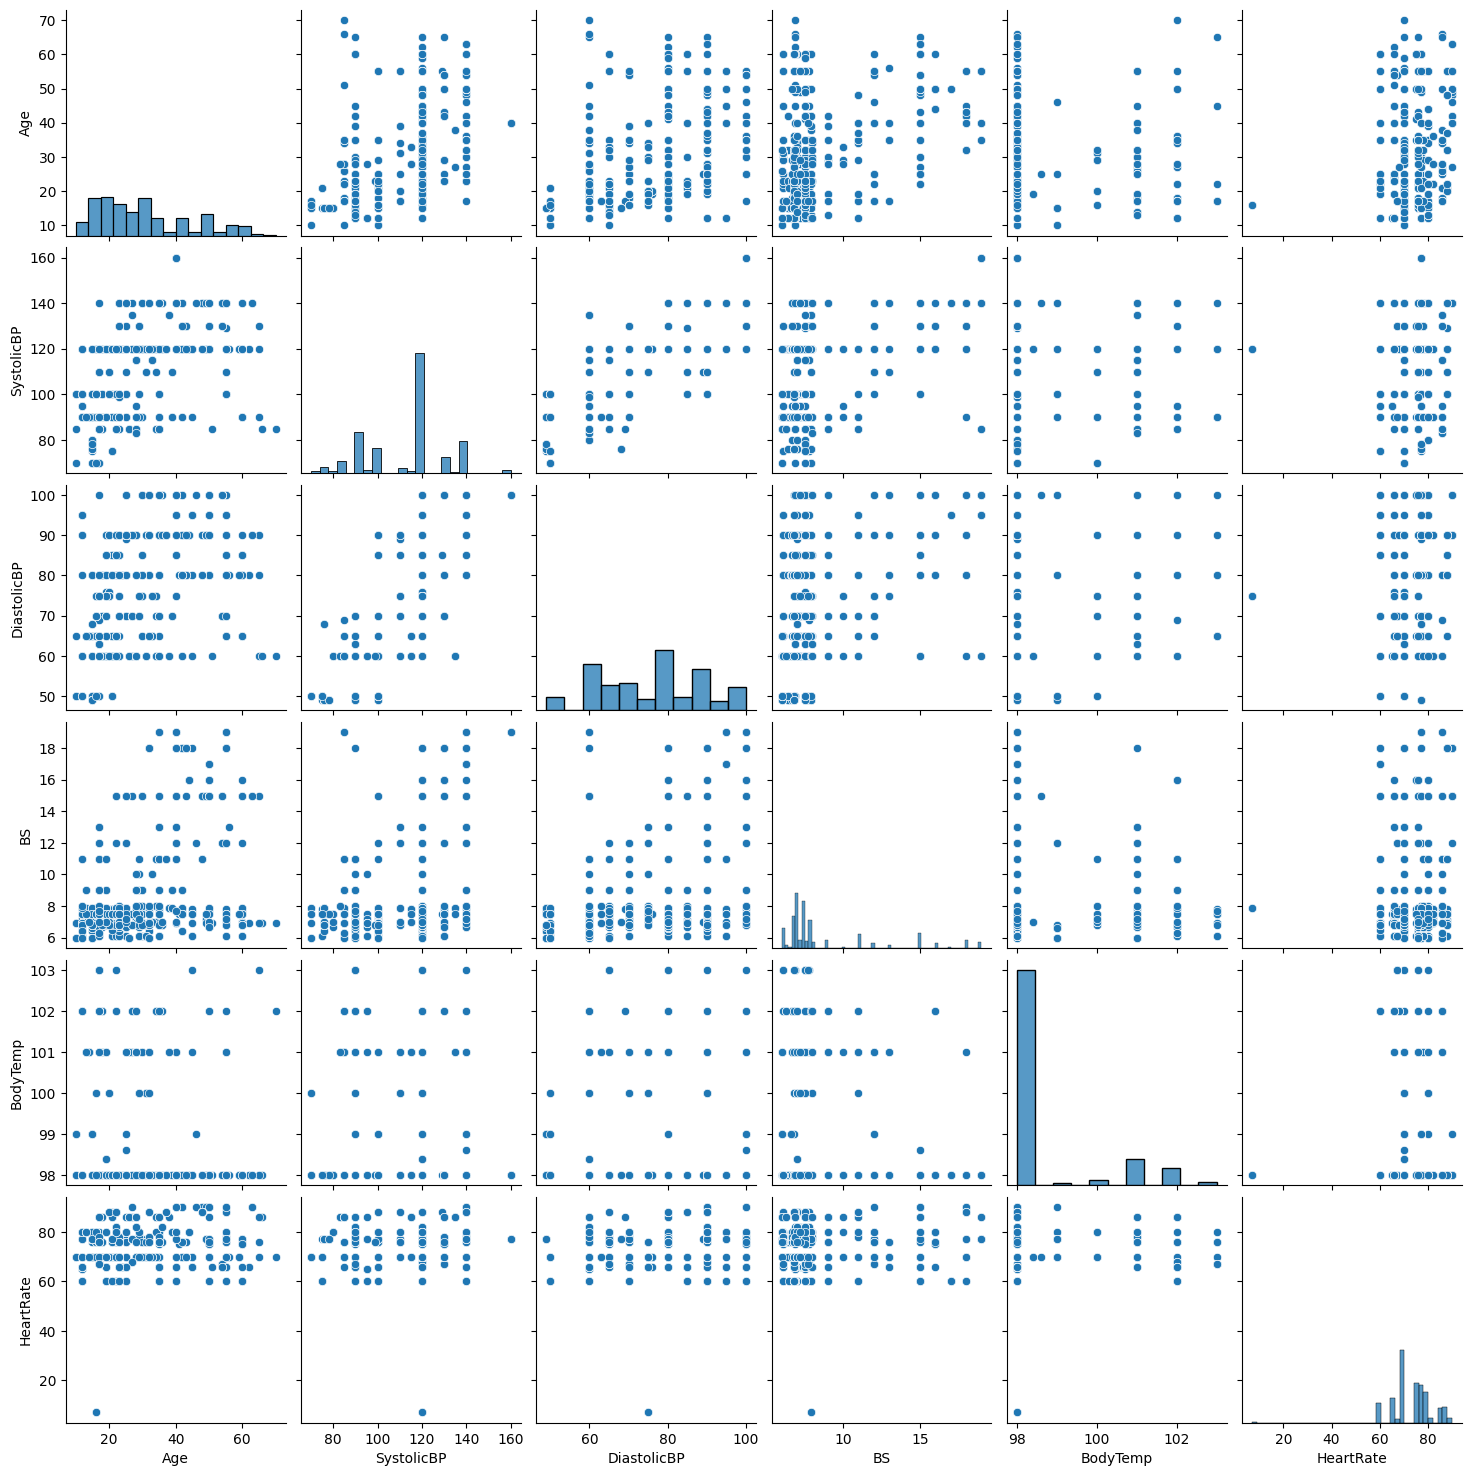

In [ ]:
sns.pairplot(df, diag_kind="hist")

<Axes: xlabel='RiskLevel', ylabel='count'>

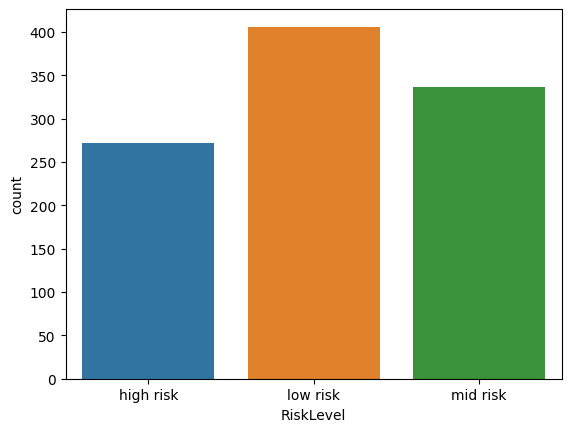

In [ ]:
sns.countplot(x='RiskLevel', data=df)

Text(0, 0.5, 'Risk Level')

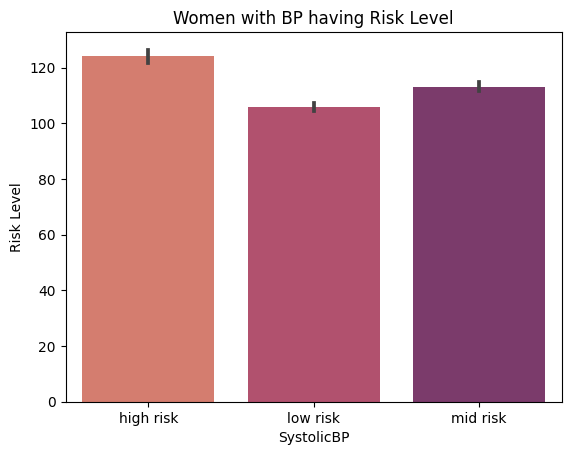

In [ ]:
sns.barplot(y='SystolicBP', x='RiskLevel', data=df, palette="flare")
plt.title('Women with BP having Risk Level')
plt.xlabel('SystolicBP')
plt.ylabel('Risk Level')

Text(0, 0.5, 'Risk Level')

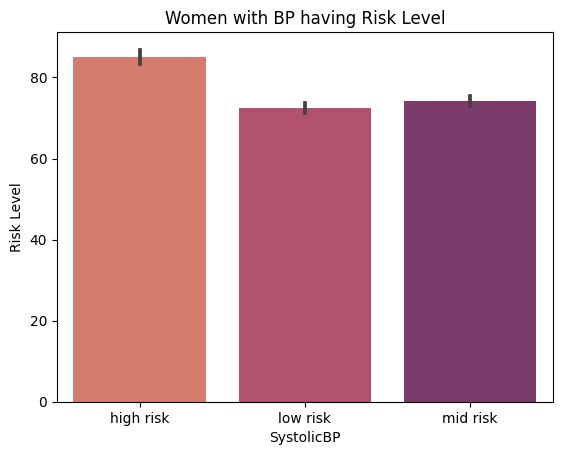

In [ ]:
sns.barplot(y='DiastolicBP', x='RiskLevel', data=df, palette="flare")
plt.title('Women with BP having Risk Level')
plt.xlabel('SystolicBP')
plt.ylabel('Risk Level')

Text(0, 0.5, 'Risk Level')

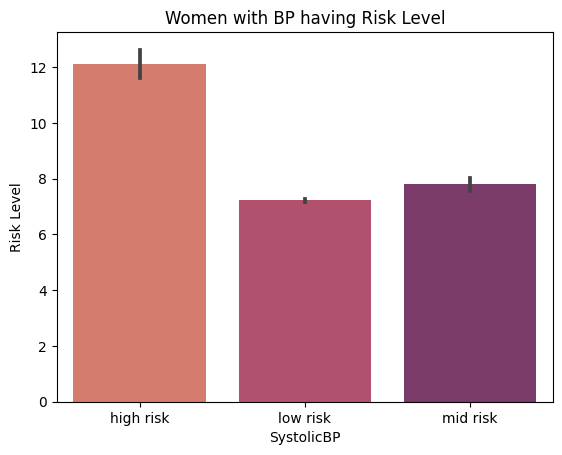

In [ ]:
sns.barplot(y='BS', x='RiskLevel', data=df, palette="flare")
plt.title('Women with BP having Risk Level')
plt.xlabel('SystolicBP')
plt.ylabel('Risk Level')

Text(0, 0.5, 'Risk Level')

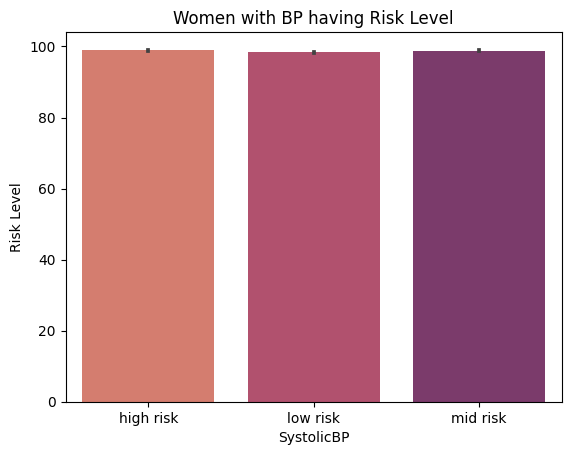

In [ ]:
sns.barplot(y='BodyTemp', x='RiskLevel', data=df, palette="flare")
plt.title('Women with BP having Risk Level')
plt.xlabel('SystolicBP')
plt.ylabel('Risk Level')

Text(0, 0.5, 'Risk Level')

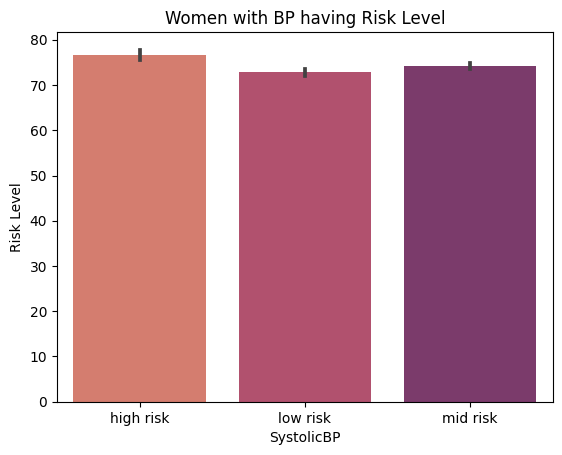

In [ ]:
sns.barplot(y='HeartRate', x='RiskLevel', data=df, palette="flare")
plt.title('Women with BP having Risk Level')
plt.xlabel('SystolicBP')
plt.ylabel('Risk Level')

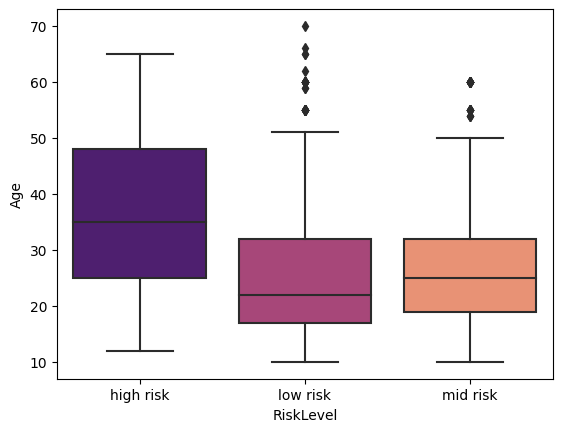

In [ ]:
sns.boxplot(data=df, x='RiskLevel', y='Age', palette="magma")
plt.show()

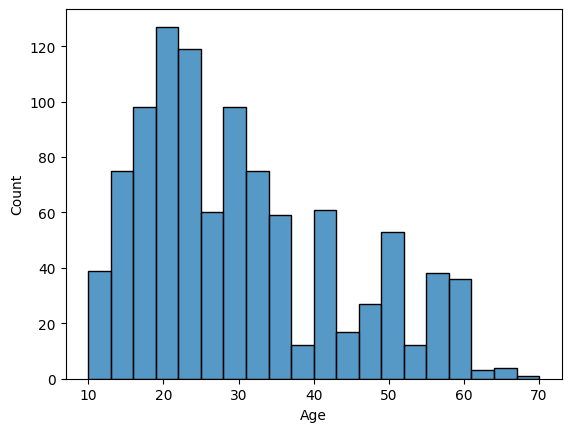

In [ ]:
sns.histplot(data=df, x='Age', bins=20)
plt.show()

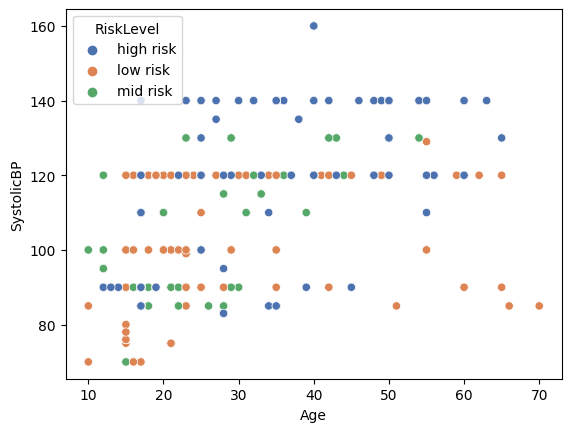

In [ ]:
sns.scatterplot(data=df, x='Age', y='SystolicBP', hue='RiskLevel', palette="deep")
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
x=list(df['RiskLevel'].unique())
le.fit(x)
df['RiskLevel']=le.transform(df.RiskLevel)

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


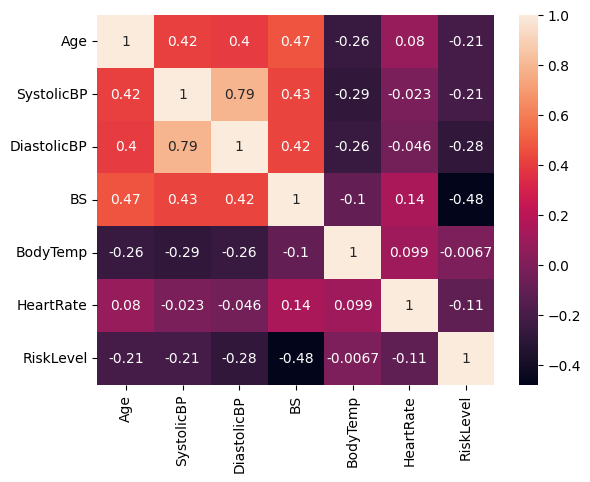

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [ ]:
X = df.drop(['RiskLevel'], axis= 1)
y = df['RiskLevel']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


##Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Importing necessary performance metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_curve, 
    roc_auc_score
)

To display the confusion matrix for the model

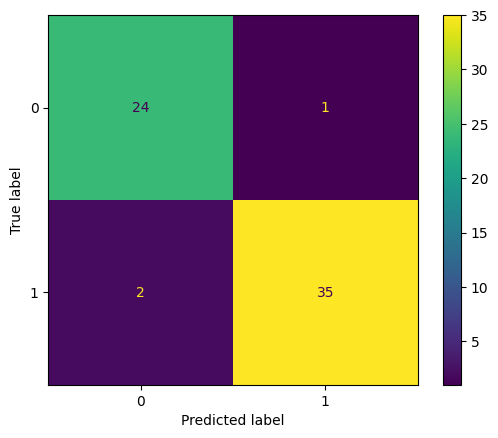

In [ ]:

labels = [0,1]
confusion_matrix_svm= confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=labels)
disp.plot();

Accuracy of the model

In [ ]:
accuracy_score_svm= accuracy_score(y_test, y_pred)
accuracy_score_svm

0.7254901960784313

F1 score of the model

In [ ]:
f1_svm= f1_score(y_pred, y_test, average="weighted")
f1_svm

0.7430885544475808

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

# Using the classifier to make predictions on the testing data
pred = clf.predict(X_test)


To display the confusion matrix

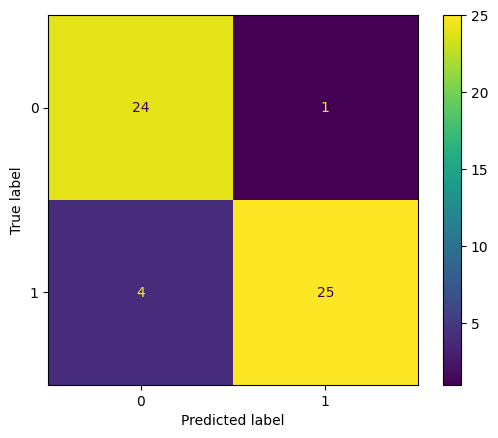

In [ ]:
labels = [0,1]
confusion_matrix_rf= confusion_matrix(y_test,pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=labels)
disp.plot();

Accuracy

In [ ]:
accuracy_score_rf= accuracy_score(y_test,pred)
accuracy_score_rf

0.7941176470588235

F1 score

In [ ]:
f1_rf= f1_score(y_pred, y_test, average="weighted")
f1_rf

0.7430885544475808

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
x=list(df['RiskLevel'].unique())
le.fit(x)
df['RiskLevel']=le.transform(df.RiskLevel)

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,0
1,35,140,90,13.00,98.0,70,0
2,29,90,70,8.00,100.0,80,0
3,30,140,85,7.00,98.0,70,0
4,35,120,60,6.10,98.0,76,1
5,23,140,80,7.01,98.0,70,0
6,23,130,70,7.01,98.0,78,2
7,35,85,60,11.00,102.0,86,0
8,32,120,90,6.90,98.0,70,2
9,42,130,80,18.00,98.0,70,0


Taking inputs

In [ ]:
def MHRP(clf):
  ip1=int(input("Enter age: "))
  ip2=int(input("Enter SystolicBP: "))
  ip3=int(input("Enter DiastolicBP: "))
  ip4=int(input("Enter Blood Sugar Level: "))
  ip5=int(input("Enter BodyTemp: "))
  ip6=int(input("Enter HeartRate: "))

  output=clf.predict([[ip1,ip2,ip3,ip4,ip5,ip6]])
  if output[0]==0:
    print("High Risk")
  elif output[0]==1:
    print("Low Risk")
  else:
    print("Mid Risk")
  
  

In [ ]:
MHRP(clf)

Enter age: 52
Enter SystolicBP: 120
Enter DiastolicBP: 80
Enter Blood Sugar Level: 110
Enter BodyTemp: 98
Enter HeartRate: 100
High Risk


#HEALTHCARE CENTRE 

In [ ]:
while True:
  print('Welcome to the Mini Health Care Centre!')
  print('Choose from the following predictors:')
  print('1. Heart Stroke Predictor  \n2. Diabetes Predictor(Females) \n3. Maternal Healthcare Predictor')
  opt = int(input('Enter your predictor choice number: '))

  if opt == 1:
    predicter(clf)
  elif opt == 2:
    DIABETES(c)
  elif opt == 3:
    MHRP(clf)
  else:
    print('Invalid Option!')
  choice = input('Do you want to continue? (y/n) ')
  if choice.lower() == 'n':
    break

Welcome to the Mini Health Care Centre!
Choose from the following predictors:
1. Heart Stroke Predictor  
2. Diabetes Predictor(Females) 
3. Maternal Healthcare Predictor
Enter your predictor choice number: 4
Invalid Option!
Do you want to continue? (y/n) n
